# **Fractional Differencing of SPY Prices**

In **financial time series analysis**, achieving **stationarity** is important for accurate modeling and forecasting. Traditional methods like **first-order differencing** can strip away valuable information embedded in the data. This project explores **fractional differencing**, a technique introduced by **Marcos Lopez de Prado**, which aims to retain more memory from the original series while making the data stationary. Our objective is to compare the performance of fractional differencing with traditional differencing methods using SPY prices. We will use the ADF

### Step 1: Import Libraries
First, import the libraries required for data manipulation, fetching data, plotting, and statistical tests

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

### Step 2: Fetch and Visualize the Data
We'll start by fetching SPY price data using the yfinance package. After acquiring the data, we will visualize the closing prices to understand the underlying trend and patterns. This step helps in assessing the nature of the data before any transformations are applied

[*********************100%%**********************]  1 of 1 completed


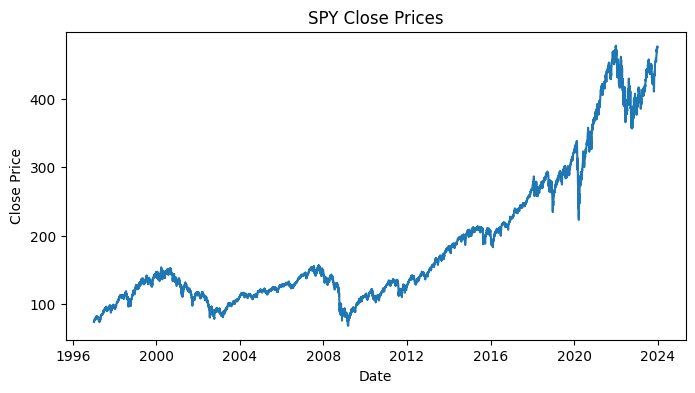

In [ ]:
# Get the data from yfinance and only keep Close prices
spy = yf.download('SPY', start='1997-01-01', end='2023-12-31')
spy = spy.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'])

# Plot the Close prices
plt.figure(figsize=(8,4))
sns.lineplot(data=spy['Close'])
plt.title('SPY Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

#### 2a. Log Transformation
Log transformation is a common technique used to stabilize the variance of a time series. By applying the natural logarithm to the SPY closing prices, we aim to achieve a more stable series that is easier to work with. This transformation also helps in normalizing the data.

$$
\text{Log_Close} = \ln(\text{Close})
$$


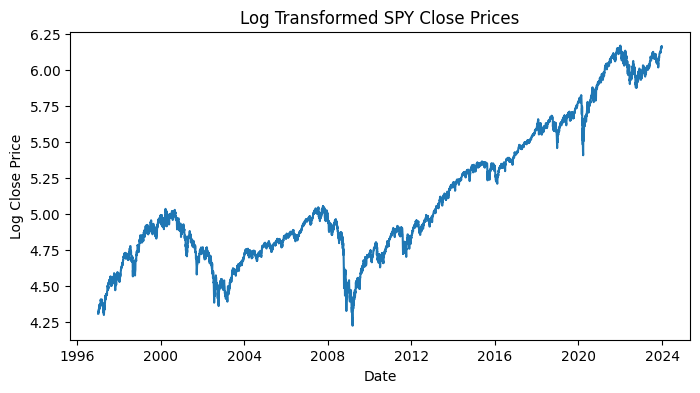

In [ ]:
# Log transformation
log_spy = pd.DataFrame({'Log_Close': np.log(spy['Close'])}, index=spy.index)

# Plot the log-transformed data
plt.figure(figsize=(8,4))
sns.lineplot(data=log_spy['Log_Close'])
plt.title('Log Transformed SPY Close Prices')
plt.xlabel('Date')
plt.ylabel('Log Close Price')
plt.show()


#### 2b. Stationarity Check (ADF)

We use the **Augmented Dickey-Fuller (ADF)** test to check if our time series is stationary. The ADF test assesses the null hypothesis that a unit root exists in the time series. If we reject the null hypothesis, the series is stationary. We'll perform this test on both the original and log-transformed data.

In [ ]:
# ADF test for original Close prices
adf_close = adfuller(spy['Close'])
print('ADF Statistic (Close): %f' % adf_close[0])
print('p-value (Close): %f' % adf_close[1])

# ADF test for log-transformed Close prices
adf_log_close = adfuller(log_spy['Log_Close'])
print('ADF Statistic (Log Close): %f' % adf_log_close[0])
print('p-value (Log Close): %f' % adf_log_close[1])

ADF Statistic (Close): 1.424818
p-value (Close): 0.997224
ADF Statistic (Log Close): -0.074059
p-value (Log Close): 0.951962


Based on the **Augmented Dickey-Fuller (ADF)** test results, the **p-values** for both the original close prices $0.996492$ and the log-transformed close prices $0.790356$ are significantly higher than the commonly used significance level of $0.05$. This indicates that we fail to reject the null hypothesis that a unit root exists in both series, suggesting that neither the original nor the log-transformed SPY close prices are stationary.

### Step 3: Fractional Differencing


#### 3a. First-Order Differencing (Traditional Differencing)
We apply **first-order differencing**. This involves subtracting the previous observation from the current one, effectively removing the trend and making the series more stationary. This technique is also commonly used to calculate returns in financial time series.

The formula for first-order differencing is:

$$
\text{Returns}_t = \text{Close}_t - \text{Close}_{t-1}
$$

Similarly, for log-transformed data, the first-order difference (log-returns) is:

$$
\text{Log_Returns}_t = \text{Log_Close}_t - \text{Log_Close}_{t-1}
$$

#### Fractional Differencing Simplification to First-Order Differencing
When the differencing order $d = 1$, the fractional differencing formula simplifies to the first-order differencing formula. The weights $w_k$ for fractional differencing are given by:

$$
w_k = (-1)^k \frac{\prod_{i=0}^{k-1}(d-i)}{k!}
$$

For $d = 1$, the weights simplify as follows:
- For $k = 0$: $w_0 = 1$
- For $k = 1$: $w_1 = -1$
- For $k \geq 2$: $w_k = 0$

This is because:

$$
w_k = (-1)^k \frac{\prod_{i=0}^{k-1}(1-i)}{k!} = (-1)^k \frac{1 \cdot 0 \cdot (-1) \cdot (-2) \cdots (1-k)}{k!} = 0 \quad \text{for} \quad k \geq 2
$$

Therefore, the fractional differencing formula:

$$
X_t' = \sum_{k=0}^{\infty} w_k \cdot X_{t-k}
$$

simplifies to:

$$
X_t' = w_0 \cdot X_t + w_1 \cdot X_{t-1} = X_t - X_{t-1}
$$

which is the same as the first-order differencing formula used to calculate returns. (All this to show fractional differencing when $ d = 1 $ is just regular first order differencing)

We will then visualize the differenced series and perform the ADF test again to check for stationarity.

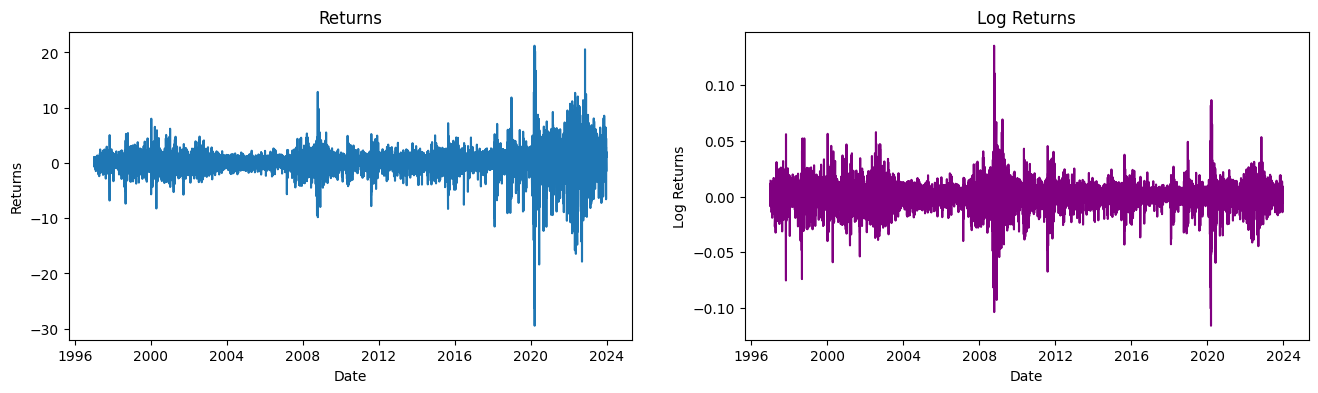

ADF Statistic (Returns): -16.416969
p-value (Returns): 0.000000
ADF Statistic (Log Returns): -15.362847
p-value (Log Returns): 0.000000


In [ ]:
# First-order differencing
spy['Returns'] = spy['Close'].diff()
log_spy['Log_Returns'] = log_spy['Log_Close'].diff()

# Plot the Returns and Log Returns
fig, ax = plt.subplots(ncols=2, figsize=(16,4))
sns.lineplot(data=spy['Returns'], ax=ax[0])
ax[0].set_title('Returns')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Returns')

sns.lineplot(data=log_spy['Log_Returns'], ax=ax[1], color='purple')
ax[1].set_title('Log Returns')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Log Returns')

plt.show()

# ADF test for Returns
adf_returns = adfuller(spy['Returns'].dropna())
print('ADF Statistic (Returns): %f' % adf_returns[0])
print('p-value (Returns): %f' % adf_returns[1])

# ADF test for Log Returns
adf_log_returns = adfuller(log_spy['Log_Returns'].dropna())
print('ADF Statistic (Log Returns): %f' % adf_log_returns[0])
print('p-value (Log Returns): %f' % adf_log_returns[1])

The ADF test results indicate that both the **returns** (ADF Statistic: $-15.0897$, p-value: $0$) and **log returns** (ADF Statistic: $-15.912$, p-value: $0$) are $stationary$, as the null hypothesis of a unit root is rejected at the 1% significance level; however, this stationarity comes at the cost of **memory loss** from the original series.

#### 3b. Fractional Differencing
Fractional differencings goal is to achieve stationarity without losing too much memory from the original series. This method allows the differencing order $d$ to be a non-integer, which helps in preserving the long-term dependencies in the time series. The process involves calculating a series of weights $w_k$ based on the desired differencing order $d$. These weights are then applied to the time series data to obtain the fractionally differenced series.

The weights $w_k$ are calculated iteratively using the following formula:

$$ w_k = \left(-w_{k-1} \times \frac{d - k + 1}{k}\right) $$

where:
- $w_0 = 1$ (the initial weight is always 1)
- $k$ is the lag number
- $d$ is the differencing order (a fractional number between 0 and 1)

For example, the first few weights are calculated as:
- $w_1 = -d$
- $w_2 = \frac{d(d-1)}{2!}$
- $w_3 = -\frac{d(d-1)(d-2)}{3!}$
$...$

In general, the $k$-th weight is given by:
$$ w_k = (-1)^k \frac{\prod_{i=0}^{k-1}(d-i)}{k!} $$

The fractional differencing of a time series $X$ is then given by:

$$ X_t' = \sum_{k=0}^{\infty} w_k \cdot X_{t-k} $$

(Basically a dot product of the weights and the lagged closing pricing)

In practice, this infinite sum is truncated when the weights $w_k$ become negligibly small, ensuring computational efficiency. When $d$ increases, you hold onto less of the original data and retain less memory from the past values. Conversely, a smaller $d$ retains more of the original data and memory.

We can visualize the lag coefficients and how it is impacted by parameter $d$

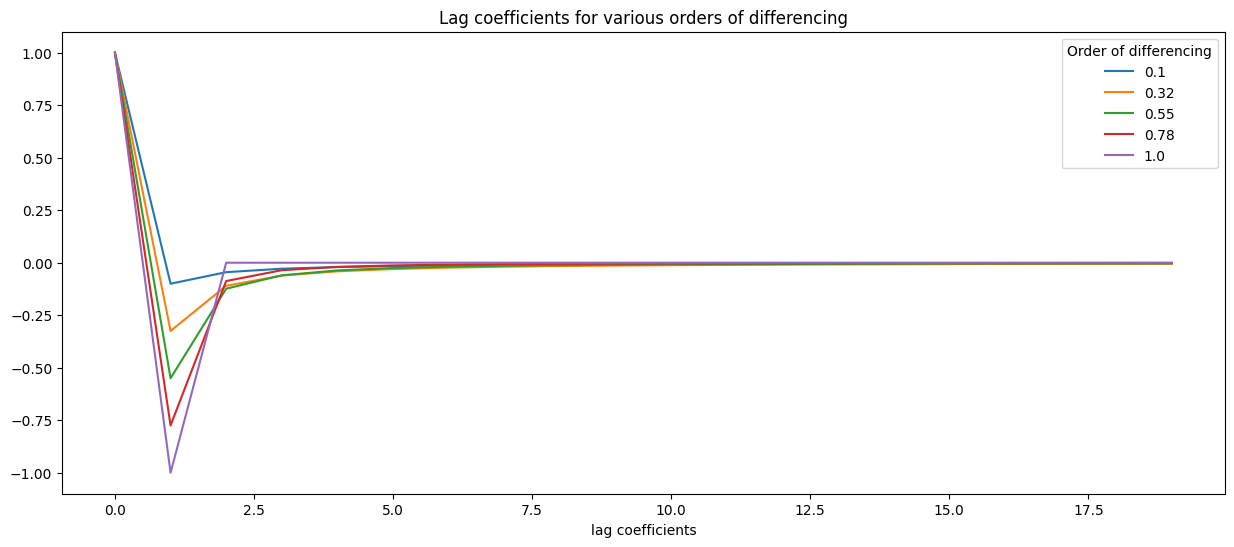

In [ ]:
def get_weights(d, lags):
    w = [1]
    for k in range(1, lags):
        w.append(-w[-1] * ((d - k + 1) / k))
    return np.array(w)

def fractional_difference(series, d, cutoff=1e-4):
    w = get_weights(d, len(series))
    w = w[np.abs(w) > cutoff]
    fractionally_differenced_series = np.zeros(len(series))

    for i in range(len(w), len(series)):
        fractionally_differenced_series[i] = np.dot(w[::-1], series[i-len(w)+1:i+1])

    return fractionally_differenced_series

# Function to plot the weights
def plot_weights(ds, lags, plots):
    weights = pd.DataFrame(np.zeros((lags, plots)))
    interval = np.linspace(ds[0], ds[1], plots)

    for i, order in enumerate(interval):
        weights[i] = get_weights(order, lags)

    weights.columns = [round(x, 2) for x in interval]
    fig = weights.plot(figsize=(15, 6))
    plt.legend(title='Order of differencing')
    plt.title('Lag coefficients for various orders of differencing')
    plt.xlabel('lag coefficients')
    plt.show()

# Apply fractional differencing and plot lag coefficients
d_values = [0.3, 0.5, 0.7, 0.9]
fractional_diff_results = {}

for d in d_values:
    fractional_diff_results[d] = {
        'Original': fractional_difference(spy['Close'].values, d),
        'Logarithmic': fractional_difference(log_spy['Log_Close'].values, d)
    }

# Plot the weights for different values of d
plot_weights((0.1, 1), 20, 5)


Example calculation using $d = 1$:

Recall the $k$-th weight is given by:
$$ w_k = (-1)^k \frac{\prod_{i=0}^{k-1}(d-i)}{k!} $$

For $d = 1$, the weights can be calculated as follows:

1. For $k = 0$:
$$ w_0 = (-1)^0 \frac{\prod_{i=0}^{-1}(1-i)}{0!} = 1 $$

2. For $k = 1$:
$$ w_1 = (-1)^1 \frac{\prod_{i=0}^{0}(1-i)}{1!} = -1 $$

3. For $k = 2$:
$$ w_2 = (-1)^2 \frac{\prod_{i=0}^{1}(1-i)}{2!} = 0 $$

4. For $k = 3$:
$$ w_3 = (-1)^3 \frac{\prod_{i=0}^{2}(1-i)}{3!} = 0 $$

Thus, the weights for $d = 1$ are:
$$ w = [1, -1, 0, 0, \ldots] $$

This pattern indicates that the first-order differencing (where $d = 1$) essentially takes the difference between consecutive values (common traditional differencing), while higher-order lags contribute zero weight as seen on the plot.


#### 3c. Visualize Fractionally Differenced Data (varying $d$)
Visualizing the **fractionally differenced** data helps us understand the impact of different values of
𝑑. We will plot the fractionally differenced series for multiple values of
𝑑 to compare their behavior and the extent to which they retain the original series memory.

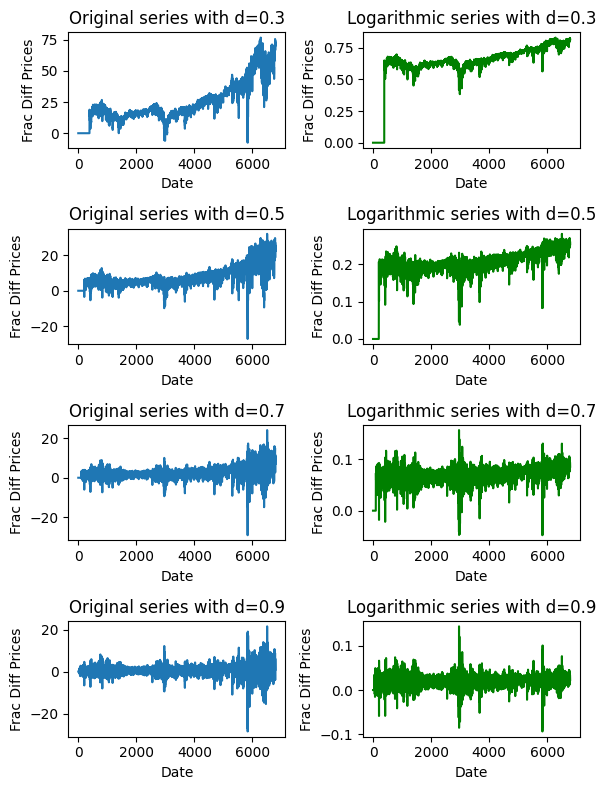

In [ ]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(6, 8))

for i, d in enumerate(d_values):
    # Original series
    sns.lineplot(data=fractional_diff_results[d]['Original'], ax=axs[i, 0])
    axs[i, 0].set_title(f'Original series with d={d}')
    axs[i, 0].set_xlabel('Date')
    axs[i, 0].set_ylabel('Frac Diff Prices')

    # Logarithmic series
    sns.lineplot(data=fractional_diff_results[d]['Logarithmic'], ax=axs[i, 1], color='green')
    axs[i, 1].set_title(f'Logarithmic series with d={d}')
    axs[i, 1].set_xlabel('Date')
    axs[i, 1].set_ylabel('Frac Diff Prices')

plt.tight_layout()
plt.show()


#### 3d. ADF Test on Fractionally Differenced Data
After applying fractional differencing, we perform the ADF test on the resulting series to check for stationarity. This step helps us validate that fractional differencing achieves the desired stationarity without over-differencing.

In [ ]:
for d in d_values:
    adf_result = adfuller(fractional_diff_results[d]['Original'][-len(spy):])
    print(f'ADF Statistic (Original, d={d}): {adf_result[0]}')
    print(f'p-value (Original, d={d}): {adf_result[1]}')

    adf_result_log = adfuller(fractional_diff_results[d]['Logarithmic'][-len(log_spy):])
    print(f'ADF Statistic (Logarithmic, d={d}): {adf_result_log[0]}')
    print(f'p-value (Logarithmic, d={d}): {adf_result_log[1]}')


ADF Statistic (Original, d=0.3): -1.0597629687222818
p-value (Original, d=0.3): 0.7308484672959498
ADF Statistic (Logarithmic, d=0.3): -3.670128844066377
p-value (Logarithmic, d=0.3): 0.004553485908219165
ADF Statistic (Original, d=0.5): -2.8490809308128866
p-value (Original, d=0.5): 0.051597692259801715
ADF Statistic (Logarithmic, d=0.5): -5.055747019366334
p-value (Logarithmic, d=0.5): 1.7194644578677616e-05
ADF Statistic (Original, d=0.7): -5.20898173436615
p-value (Original, d=0.7): 8.428355767654545e-06
ADF Statistic (Logarithmic, d=0.7): -7.172611500350813
p-value (Logarithmic, d=0.7): 2.77924025986186e-10
ADF Statistic (Original, d=0.9): -9.32817471864483
p-value (Original, d=0.9): 9.485416109320953e-16
ADF Statistic (Logarithmic, d=0.9): -10.852480072459313
p-value (Logarithmic, d=0.9): 1.5164352730919167e-19


The ADF test results for the fractionally differenced series with $ d = 0.3 $ show that the original series is not stationary, while the log-transformed series is stationary at the 1% significance level. For $ d = 0.5 $, the original series is borderline stationary, but the log-transformed series is clearly stationary. At $ d = 0.7 $, both the original and log-transformed series are stationary. Finally, with $ d = 0.9 $, both the original and log-transformed series exhibit strong stationarity. These results suggest that as the differencing parameter $ d $ increases, the series achieves stationarity while preserving more memory from the original data compared to integer differencing.

#### 3e. Plotting Fractionally Differenced Series for Various Orders of Differencing $(d)$

We visualize the fractionally differenced series for both the original and logarithmic SPY prices. We use different orders of differencing to observe how the fractional differencing impacts the series. Each subplot shows the results for a specific differencing order $(d)$.


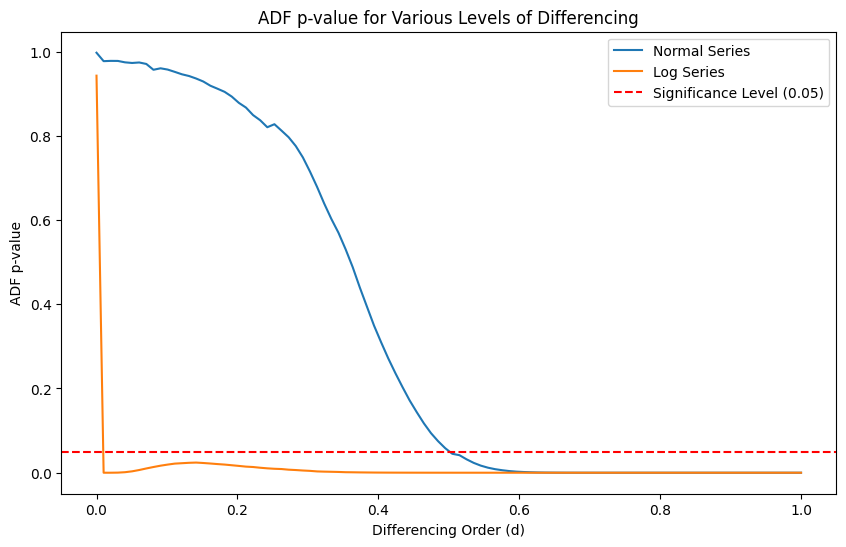

In [ ]:
"adf_p_values_normal = []
adf_p_values_log = []

d_values = np.linspace(0, 1, 100)

for d in d_values:
    # Fractionally differenced series for normal and log series
    fractionally_diff_series_normal = fractional_difference(spy['Close'].values, d)
    fractionally_diff_series_log = fractional_difference(log_spy['Log_Close'].values, d)

    # ADF test for normal series
    adf_result_normal = adfuller(fractionally_diff_series_normal[-len(spy):])
    adf_p_values_normal.append(adf_result_normal[1])

    # ADF test for log series
    adf_result_log = adfuller(fractionally_diff_series_log[-len(log_spy):])
    adf_p_values_log.append(adf_result_log[1])

# Plotting the ADF p-values for both series
plt.figure(figsize=(10, 6))
sns.lineplot(x=d_values, y=adf_p_values_normal, label='Normal Series')
sns.lineplot(x=d_values, y=adf_p_values_log, label='Log Series')
plt.axhline(y=0.05, color='red', linestyle='--', label='Significance Level (0.05)')
plt.title('ADF p-value for Various Levels of Differencing')
plt.xlabel('Differencing Order (d)')
plt.ylabel('ADF p-value')
plt.legend()
plt.show()


The ADF p-value plot for various levels of differencing shows that for the normal series, the p-value gradually decreases as the differencing order $ d $ increases, crossing the significance level of $0.05$ around $ d = 0.5 $. This indicates that the normal series becomes stationary at around $ d = 0.5 $. For the log series, the p-value remains below the significance level of $0.05$ for all differencing orders, suggesting that the log-transformed series achieves stationarity with minimal differencing.